In [46]:
import torch
from torch import nn
import matplotlib.pyplot as plt
weight, bias = 0.3, 0.9
X = torch.arange(0,1,0.01)
y = X*weight + bias
size = int(len(X)*0.8)
X_train, y_train = X[:size], y[:size]
X_test, y_test = X[size:], y[size:]
def plot_data(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, preds=None):
  plt.scatter(x=train_data, y=train_label, c="b", s=5, label="Training data")
  plt.scatter(x=test_data, y=test_label, c="r", s=5, label="Test data")
  if preds is not None:
    plt.scatter(x=test_data, y=preds, c="g", s=5, label="Predictions")
  plt.xlabel("X")
  plt.ylabel("y")
  plt.title("Plotting the data")
  plt.legend()
  plt.show()

In [47]:
X

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900])

In [48]:
print(f"Length of train data : {len(X_train)}")
print(f"Length of test data : {len(X_test)}")

Length of train data : 80
Length of test data : 20


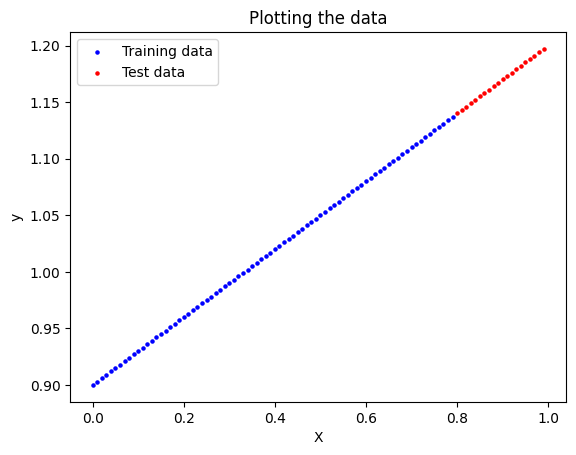

In [49]:
plot_data()

In [50]:
class SimpleLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [51]:
model = SimpleLinearRegression()
model.state_dict()

OrderedDict([('weights', tensor([0.4081])), ('bias', tensor([0.0899]))])

In [52]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [53]:
epochs = 300

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model.train()

  y_pred = model(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_pred = model(X_test)

    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 20 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.7674288749694824 | MAE Test Loss: 0.6998665928840637
Epoch: 20 | MAE Train Loss: 0.536223828792572 | MAE Test Loss: 0.42916160821914673
Epoch: 40 | MAE Train Loss: 0.3050190508365631 | MAE Test Loss: 0.15845677256584167
Epoch: 60 | MAE Train Loss: 0.09429236501455307 | MAE Test Loss: 0.09190728515386581
Epoch: 80 | MAE Train Loss: 0.06775642931461334 | MAE Test Loss: 0.1443636417388916
Epoch: 100 | MAE Train Loss: 0.06042417883872986 | MAE Test Loss: 0.13879331946372986
Epoch: 120 | MAE Train Loss: 0.05357014015316963 | MAE Test Loss: 0.12349817901849747
Epoch: 140 | MAE Train Loss: 0.0467161126434803 | MAE Test Loss: 0.1082029938697815
Epoch: 160 | MAE Train Loss: 0.039862073957920074 | MAE Test Loss: 0.09290777146816254
Epoch: 180 | MAE Train Loss: 0.03300892189145088 | MAE Test Loss: 0.07726810872554779
Epoch: 200 | MAE Train Loss: 0.026157721877098083 | MAE Test Loss: 0.06094053387641907
Epoch: 220 | MAE Train Loss: 0.019306451082229614 | MAE Test Loss:

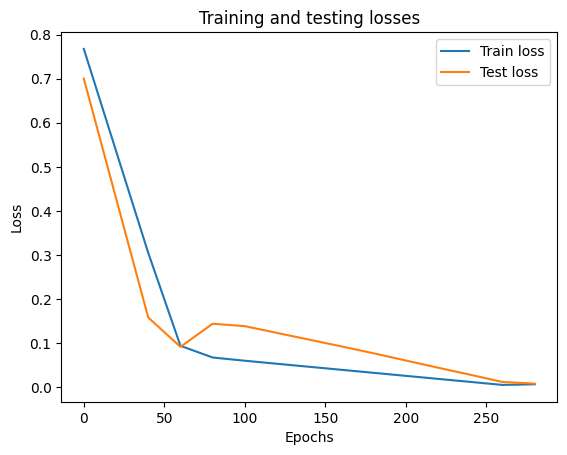

In [55]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and testing losses")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [56]:
model.state_dict()

OrderedDict([('weights', tensor([0.3040])), ('bias', tensor([0.8914]))])

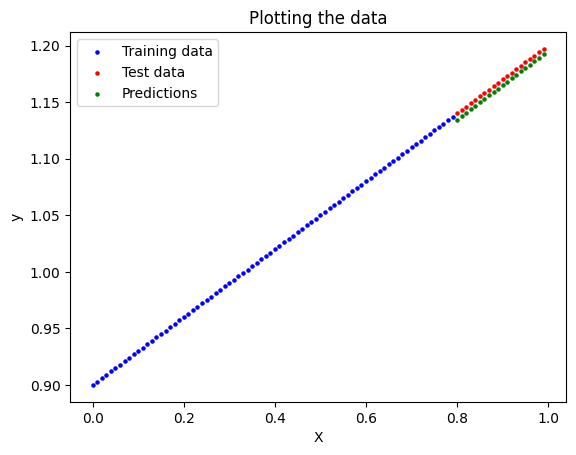

In [57]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)

plot_data(preds=y_preds)

In [58]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "basic_linear_model"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

In [59]:
loaded_model = SimpleLinearRegression()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [61]:
y_preds_loaded = loaded_model(X_test)
y_preds_loaded == y_preds

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])